# Important
To Execute a cell. Press Shift+Enter or Ctrl+Enter

In [2]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

## Printing

In [5]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

#if you want to show line number View --> Toggle Line Number

3


## Conditional Statement

In [6]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


## Define a function

In [7]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

21


## While Loop

In [8]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #that's how you avoid new line

12345678910

## For Loop

In [9]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [10]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


## For Comprehension
We will be using it a lot in this class

In [ ]:
#But this is ugly
#let us use list comprehension makes it much easier to read
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


## Numpy array and broadcast operation

In [ ]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 10 equally spaced
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
[ 0.          0.01234568  0.04938272  0.11111111  0.19753086  0.30864198
  0.44444444  0.60493827  0.79012346  1.        ]
[ 1.          1.11751907  1.24884887  1.39561243  1.5596235   1.742909
  1.94773404  2.17662993  2.43242545  2.71828183]
[ 6 10 14 18 22 26]


## Plotting

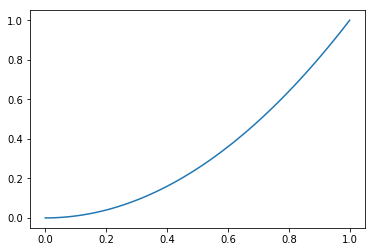

In [ ]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

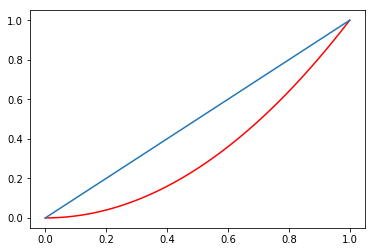

In [ ]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

# Root Finding

## Consider $x = cos(x)$. Our goal is to solve for x that satisfy that.

Plot something that helps you solve it.

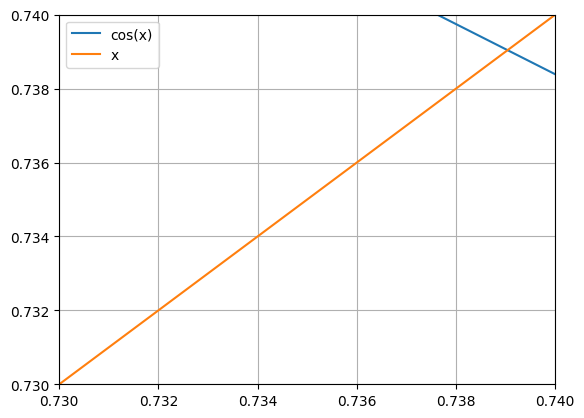

In [3]:
xs = np.linspace(0,np.pi,100)
ys = np.cos(xs)
plt.plot(xs,ys,label='cos(x)')
plt.plot(xs,xs,label=('x'))
plt.xlim(0.73,0.74)
plt.ylim(0.73,0.74)
plt.legend()
plt.grid()

## Given the what you did what is your answer?

In [4]:
x = (0.7375+0.74)/2
print(x)
print(np.cos(x))

0.73875
0.7393108414711419


## How accurate is your answer?
$answer = \ldots \pm \ldots$

Accuracy is also an important part for numerical algorithm --> How fast we can improve our accuracy.

## Make it more accurate

## Write the equation above as $f(x)= 0$

# Bisection

## If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution by looking only at $f(0.2)$ and $f(1.2)$

In [5]:
def f(x):
  return np.cos(x)-x

In [6]:
f(0.2)*f(1.2)<0

True

## Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

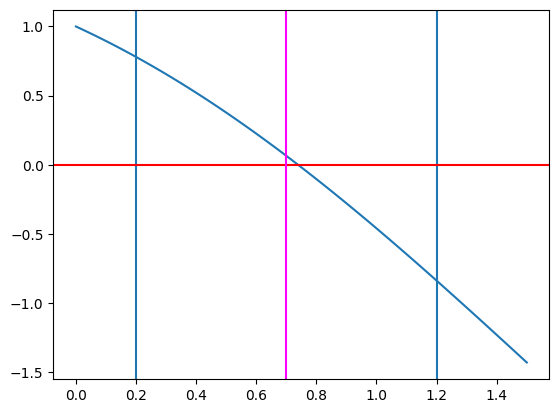

In [9]:
left = 0.2
right = 1.2
center = (left + right)/2
xs = np.linspace(0,1.5,100)
plt.axvline(left)
plt.axvline(right)
plt.plot(xs,f(xs))
plt.axhline(0,color='red')
plt.axvline(center,color='magenta')


In [11]:
def f(x):
  return np.cos(x)-x

def bisection(f, l:float, r:float, n:int) -> float:
  for i in range(n):
    c = (l+r)/2
    if f(c)*f(l)<0:
      r=c
    else:
      l=c
  return c

sol=bisection(f,0.2,1.2,30)
print(sol,f(sol))

0.7390851339325308 -1.2005993976771379e-09


In [38]:
def fy(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
b = bisection(fy,0.4,1,30)
print(b)

0.7854090625420213


## If we guess right in the middle of the two bound what would be the error on our guess?
$$
    answer = \ldots \pm \ldots
$$


## If you want to make a new pair of bound which pair would you pick? How did you know?

## Write a function which find solution to f(x)=0 using the method you just discovered. Try plotting as you go.

## Given that the intial bound is of size $S$. After $n$ iterations how accurate is your answer?

$$\text{error}(n) = \ldots$$

## Give me the solution to  $x=cos(x)$ that is at most  $10^{−6}$ away from the real answer. Verify your solution graphically.

# Newton's Method
Let us do someting a bit more efficient. Suppose that we want to solve  $x^3−x=1$  using Newtons's method with initial guess at  $x=2$ . If you start to get lost, PLOT!.

## What is the function that we are trying to find intercept? Plot it.

## What is the slope of the tangent line at $x=2$

## What is the equation for the tangent line at  $x=2$ Plot it along with the function.

## What is the intercept for that line? That's your new guess.

## Now combine everything in to one formula you should get something along the line of

$$
x_{n+1} = \ldots - \frac{\ldots(x_n)}{\ldots(x_n)}
$$

This is called update rule; how you get an improved answer from the previous guess.

## Newton's method converges very very quickly. We will go through the derivation later on.
Now find solution to $x^3−x=1$. Also as a plotting exercise try make something similar to this figure:

Here is how I annotate the figure
`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

<div>
<img src="attachment:trythis.png" width="600"/>
</div>


## Solve $\sqrt[3]{x}=0$ by hand. What's $x$?

## Try Newton's method on it.
Try plotting as you go to see what's going on.

Now you learn that even though it converges super fast. It doesn't guarantee to converge.

# Bonus


## Simplify (1+x)-1

## Then why is this false

In [ ]:
x = 1e-10
print (x)
print ((1+x)-1 == x)

1e-10
False
